# 多項式的回歸模型 (PolynomialFeatures)
對於線性回歸來說，資料都是很均勻地分布在一條直線上，但現實的資料往往是非線性的分佈。如果我們一樣使用上述方法取得線性模型，在實際場域上預測效果可能並不大。

[參考網址](https://github.com/andy6804tw/2021-13th-ironman/tree/main/8.%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8)

### Python

#### PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
它是使用多項式的方法來進行的，如果有a，b兩個特徵，那麼它的2次多項式為 $（1,a,b,a^2,ab, b^2）$ ，這個多項式的形式是使用poly的效果。

[參考網址](https://blog.csdn.net/hushenming3/article/details/80500364)

#### PolynomialFeatures有三個參數

*   degree：控制多項式的度

*   interaction_only： 默認為False，如果指定為True，那麼就不會有特徵自己和自己結合的項（只產生交互項），上面的二次項中沒有$a^2$和$b^2$。

*   include_bias：默認為True。如果為True的話，那麼就會有常數項 ($\beta_0$)。

*   order{‘C’, ‘F’}, default=’C’ : Order of output array in the dense case. 'F' order is faster to compute, but may slow down subsequent estimators.

[參考網址](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

#### 基本計算方法

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn') #設定背景


# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y
X, y = make_data(100)


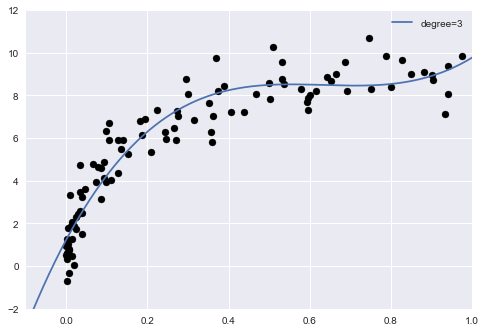

In [4]:
# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

# degree = 3
degree = 3
Poly3 = PolynomialFeatures(degree)
pre_x_train = Poly3.fit_transform(X)
LR = LinearRegression()
LR.fit(pre_x_train,y)

pre_x_test = Poly3.fit_transform(x_test)
y_test = LR.predict(pre_x_test)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))

plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

#### 使用函數寫法

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('seaborn') #設定背景

# make_pipeline是指可以將多個Sklearn的function一起執行
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y

X, y = make_data(100)

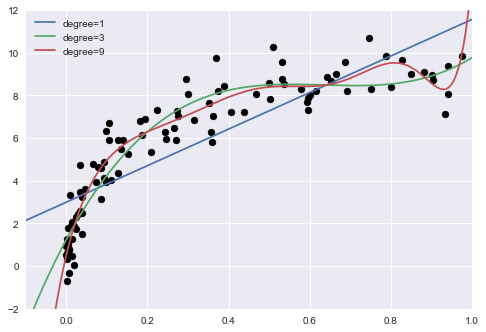

In [6]:
# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

# 測試 1,3,7 的degree
for degree in [1,3,9]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

##### 差異比較

In [7]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

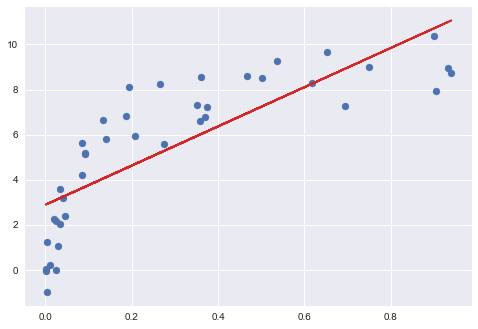

In [15]:
#簡單線性回歸
plt.style.use('seaborn')
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x, yfit, color="#d62728")

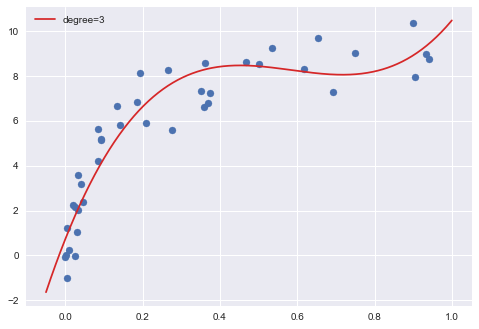

In [9]:
#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=PolynomialRegression(3).fit(x,y).predict(x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(3), color="#d62728")
plt.legend(loc='best')

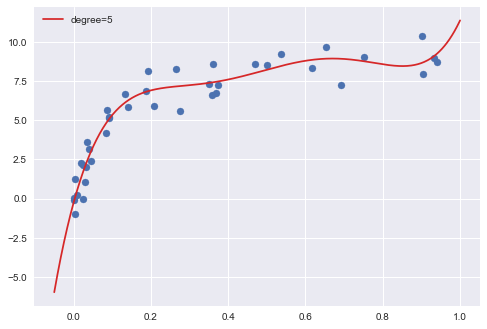

In [10]:
poly = np.polyfit(x.reshape(-1), y, deg=5)

#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=np.polyval(poly, x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(5), color="#d62728")
plt.legend(loc='best')

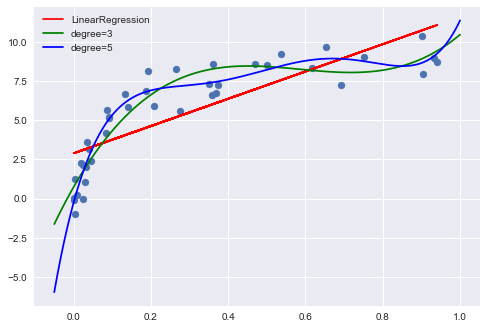

In [28]:
#簡單線性回歸
plt.style.use('seaborn')
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)

#3次poly
x_test_3 = np.linspace(-0.05,1,500)[:,None]
y_test_3=PolynomialRegression(3).fit(x,y).predict(x_test_3)

#5次poly
x_test_5 = np.linspace(-0.05,1,500)[:,None]
y_test_5=PolynomialRegression(5).fit(x,y).predict(x_test_5)

plt.scatter(x,y)
plt.plot(x, yfit,label='LinearRegression', color="r")
plt.plot(x_test_3.ravel(),y_test_3,label='degree={}'.format(3), color="g")
plt.plot(x_test_5.ravel(),y_test_5,label='degree={}'.format(5), color="b")
plt.legend(loc='best')